<a href="https://colab.research.google.com/github/Baldezo313/Some-real-world-machine-learning-project/blob/main/PROJET_13_UTILISATION_DE_L'OUTIL_TPOT_COMME_ASSISTANT_INTELLIGENT_DANS_UN_PROJET_DE_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 13 : UTILISATION DE L'OUTIL TPOT COMME ASSISTANT INTELLIGENT DANS UN PROJET DE MACHINE LEARNING  

Que diriez-vous d'un outil qui vous facilite la vie en vous aidant à trouver, de manière automatique et optimisée, le meilleur modèle de Machine Learning pour vos données ? . Eh
oui ! Un tel outil existe bel et bien et il est à la portée de tous. Dans ce projet vous apprendrez, à travers un cas d'étude, comment utiliser la librairie **TPOT** dans Python afin d'automatiser entièrement vos pipelines de Machine Learning et de trouver le meilleur modèle pour ajuster vos données. Le cas d'étude est la prédiction de dons de sang dans les universités de Taiwan.  
L'objectif est de prédire si un ancien donneur est susceptible de donner à nouveau du sang.

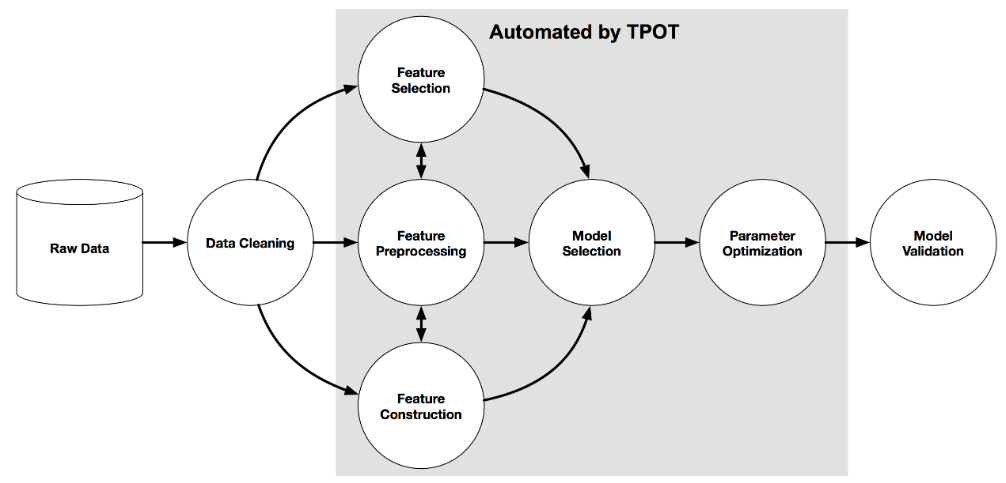

## CONTEXTE  

Très souvent dans un projet de Machine Learning, on recherche le modèle qui donnera le meilleur score (la métrique d'évaluation du modèle est définie en fonction du problème qu'on traite). Malheureusement, il existe une multitude de combinaisons de techniques possibles pour les étapes de construction. Ces étapes concernent le nettoyage des données, la sélection de variables, la réduction de dimension, la transformation des variables catégorielles en variables numériques, la standardisation, la modélisation, le réglage des hyperparamètres, etc. Dès lors,
le défi qui se pose est de trouver la meilleure combinaison de techniques pour minimiser les erreurs de prédictions. Une très bonne compréhension des données et aussi une bonne expérience peuvent être de grands atouts. Mais dans certains cas, on ne sait vraiment pas par où commencer et/ou ce qu'on pourrait faire de plus pour améliorer le modèle. Ceux qui ont l'habitude des compétitions en Data Science comprendront très bien. Dans ces compétitions, le détail compte beaucoup car les scores sont souvent affichés à 4 chiffres après la virgule et même plus. En tant qu'humain, il est normal qu'après avoir essayé une dizaine de combinaisons possibles qu’on soit fatigué et qu'on veuille passer à autre chose. Heureusement, il existe un puissant outil qui peut réaliser automatiquement des milliers de combinaisons de techniques et vous générer le code du meilleur pipeline qui a donné le meilleur score pour l'ajustement de vos données. La librairie TPOT peut être considérée comme votre assistant en Data Science. Elle vous permettra d'aller prendre du café, de papoter avec vos collègues, jouer au baby-foot, et même dormir si vous voulez pendant qu'elle travaille pour vous.  

N'est-ce pas génial ! En lisant ce projet, l'automatisation de vos pipelines Machine Learning avec l'outil TPOT n'aura plus aucun secret pour vous.  



**PRESENTATION DE L'OUTIL TPOT**  

[TPOT](https://epistasislab.github.io/tpot/using/)  est une librairie de Python qui optimise les pipelines de Machine Learning à l'aide de la programmation génétique. Le but de ce projet n'est pas d'expliquer la théorie sur la programmation génétique. Ce qui nous intéresse ici est de comprendre, de manière très pratique, l'utilisation de l'outil TPOT. Grâce à cet outil, vous pouvez explorer automatiquement des centaines de pipelines possibles pour trouver le meilleur pour votre dataframe. Pour installer TPOT, vous pouvez suivre les instructions dans cette [page](https://epistasislab.github.io/tpot/installing/) . Pour le présent cas d'étude, nous
utiliserons TPOT pour nous aider à trouver un modèle que nous pouvons ensuite explorer et optimiser davantage. Après avoir préparé vos données, vous les utilisez pour entraîner l'algorithme que vous avez choisi puis vous régler ses hyperparamètres afin d'optimiser le score du modèle. La data Science étant un processus itératif, il n'est pas rare de revenir en arrière afin de revoir telle ou telle autre technique dans la préparation des données, refaire une autre modélisation puis un nouveau réglage des hyperparamètres. De plus, plusieurs algorithmes sont entraînés puis évalués. Au lieu de faire tout cela par vous-même, l'outil TPOT automatise toutes ces étapes de recherche de la meilleure combinaison de techniques sous le principe de la programmation génétique. Mieux encore, TPOT vous génère le code du meilleur pipeline qui a donné le meilleur score pour l'ajustement de vos données. Passons à la pratique !


### ETUDE DE CAS D'APPLICATION DE L'OUTIL TPOT : PRÉDICTION DES DONS DE SANG  

Selon l'organisation Mondiale de la Santé (OMS), "le sang est le cadeau le plus précieux qu'une personne puisse faire à une autre personne : le cadeau de la vie." Malheureusement, il y a une
tendance baissière dans les dons de sang et cela est encore plus grave dans des régions très vulnérables du globe.  

Le Machine Learning peut aider dans la prédiction des futurs dons de sang et ainsi sauver des vies. L'objectif de cette étude de cas est de construire un modèle qui prédit si un donneur de
sang est susceptible de donner à nouveau du sang. Nous utilisons TPOT pour nous aider à trouver un modèle que nous essayerons d'optimiser davantage.  

Commençons par importer les librairies nécessaires pour cette étude.

In [2]:
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.6 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=e52c6b40b53cbfc247694c25ad2fd5da9618e23bb5a61feb1e09c013271a3285
  Stored in directory: /root/.cache/pip/wheels/da/77/2d/adbc56bc4db95ad80c6d4e71cd69e2d9d122174904342e3f7f
Successfully built stopit


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tpot import TPOTClassifier
from sklearn.linear_model import LogisticRegression

**DONNEES**

Le jeu de données se compose d'un échantillon aléatoire de 748 donneurs du centre de services de transfusion sanguine de la ville de Hsin-Chu à Taiwan. Vous pouvez télécharger les données
via le répertoire [UCI Machine Learning](https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center) et consulter leur description détaillée.

In [4]:
#Imporation et affichage des données
df = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/transfusion.data?token=GHSAT0AAAAAAC4VKTEQ3VXUUR7OOJSY2YGEZ4OGPAQ')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


* Renommons la variable cible :

In [5]:
#Renommer la variable d'intérêt 'whether he/she donated blood in March 2007'
df.rename(columns={'whether he/she donated blood in March 2007':'Is a donor'}, inplace=True)
#Informations sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   Is a donor             748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


La variable d'intérêt *'Is a donor'* est binaire. 0 : le donneur ne donnera pas de sang ; 1 : le
donneur donnera du sang. Par ailleurs, il n'y a pas de valeurs manquantes et les variables sont
stockées dans les types adéquat (entiers naturels). On peut donc dire que le jeu de données est
propre et peut être directement utilisé pour la modélisation. Très souvent, il faut passer par une
étape plus ou moins fastidieuse de nettoyage de données avant l'entraînement des algorithmes.
J'ai choisi un jeu de données propre et léger pour vous permettre de vous focaliser sur
l'utilisation de l'outil TPOT. Cependant, ce que vous apprendrez ici peut être très bien appliqué
pour des jeux de données beaucoup plus importants en taille et nécessitant une bonne phase de
préparation. Avant de passer à la modélisation proprement dite, divisons les données en
ensemble d'entraînement et de validation.

In [6]:
#Train/Test split
seed = 123
target = df.pop('Is a donor')

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, stratify=target)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(598, 4)
(598,)
(150, 4)
(150,)


**APPLICATION DE TPOT**  

Puisqu'il s'agit d'un problème de classification, nous avons importé la classe TPOTClassifier. Pour un problème de régression,
il faudra importer la classe TPOTRegressor. Consultez [ici](https://epistasislab.github.io/tpot/api/) la signification des paramètres de TPOTClassifier.

In [7]:
#Création d'une instance de la classe TPOTClassifier
tpot = TPOTClassifier(generations=10,
                      population_size=10,
                      verbosity=2,
                      offspring_size=10,
                      scoring='roc_auc',
                      config_dict='TPOT light',
                      cv = 5,
                      random_state=seed)



* **generations** : nombre d'itérations du processus d'optimisation du pipeline d'exécution. La valeur par défaut est 100.
* **population_size** : nombre d'individus à conserver dans la population de programmation génétique à chaque génération. La valeur par défaut est 100.  
* **verbosity** : La quantité d'informations que TPOT communique pendant son exécution.
* **offspring_size** : nombre de descendants à produire dans chaque génération de programmation génétique. La valeur par défaut est 100.
* **scoring** : Fonction utilisée pour évaluer la qualité d'un pipeline donné pour le problème de classification. La valeur par défaut est 'accuracy'.
* **config_dict** : Un dictionnaire de configuration pour personnaliser les opérateurs et les paramètres que TPOT recherche dans le processus d'optimisation. La valeur par défaut
est None. 'TPOT light' indique que TPOT utilisera une configuration intégrée avec uniquement des modèles et préprocesseurs rapides.
* **cv** : Stratégie de validation croisée utilisée lors de l'évaluation des pipelines. La valeur par défaut est 5.
* **random_state** : Choisissez un entier naturel. Utilisez ce paramètre pour vous assurer que TPOT vous donnera les mêmes résultats chaque fois que vous l'exécutez avec le même ensemble de données avec le même entier naturel

In [8]:
#Entraînement
tpot.fit(X_train, y_train)

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_regressor


Optimization Progress:   0%|          | 0/110 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7499789351791921

Generation 2 - Current best internal CV score: 0.7503272402260409

Generation 3 - Current best internal CV score: 0.7505618658488652

Generation 4 - Current best internal CV score: 0.7505618658488652

Generation 5 - Current best internal CV score: 0.7552591884983726

Generation 6 - Current best internal CV score: 0.7553351218817592

Generation 7 - Current best internal CV score: 0.7555743076264065

Generation 8 - Current best internal CV score: 0.7555743076264065

Generation 9 - Current best internal CV score: 0.7555743076264065

Generation 10 - Current best internal CV score: 0.7555743076264065

Best pipeline: LogisticRegression(MinMaxScaler(input_matrix), C=20.0, dual=False, penalty=l2)


TPOTClassifier(config_dict='TPOT light', generations=10, offspring_size=10,
               population_size=10, random_state=123, scoring='roc_auc',
               verbosity=2)

Pour chacune des 10 générations calculées, nous avons le score CV du modèle. Comme vous le voyez, le meilleur pipeline est celui qui a le score de précision CV égal à 75.557%.
L'algorithme de classification est la Régression logistique précédée d'une étape de prétraitement des données avec MinMaxScaler(). Le code ci-dessous permet d'afficher les étapes du meilleur pipeline trouvé :

In [9]:
#Affichage des étapes du meilleur pipeline
print('\nEtapes du meilleur pipeline:', end='\n')

for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
  print(f'{idx}. {transform}')


Etapes du meilleur pipeline:
1. MinMaxScaler()
2. LogisticRegression(C=20.0, random_state=123)


Auriez-vous pensé à un tel pipeline ? C'est possible. Le pipeline trouvé est plutôt simple.  
Cependant, il arrive aussi parfois que TPOT propose un pipeline très complexe. Quel est le score sur les données de validation ?

In [11]:
# AUC score du modèle tpot sur les données de validation
tpot_auc_score2 = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score on test data for the second tpot: {tpot_auc_score2:.4f}')


AUC score on test data for the second tpot: 0.7223


Le score sur les données de validation est de 72,22%.

En augmentant les valeurs des arguments *generations*, *population_size*, et *offspring_size*, vous
augmentez le nombre de combinaisons que l’outil TPOT va essayer et ainsi augmenter votre chance de trouver un modèle avec un meilleur score. Rappelez-vous que la valeur par défaut
pour ces 3 paramètres et 100. Mais une telle valeur fera que l'algorithme peut prendre plusieurs heures pour s'exécuter. L'objectif de ce projet est de vous montrer le principe du fonctionnement du TPOT. Vous pouvez essayer vos propres valeurs pour tenter d'améliorer davantage le modèle. Nous allons quand même augmenter (doubler) la valeur de ces 3 arguments afin de
voir ce qui se passera.

In [12]:
#Création d'une autre instance de la classe TPOTClassifier
tpot2 = TPOTClassifier(generations=30,
                       population_size=30,
                       verbosity=2,
                       offspring_size=30,
                       scoring='roc_auc',
                       config_dict='TPOT light',
                       cv = 5,
                       random_state=seed)

#Entraînement
tpot2.fit(X_train, y_train)

#Affichage des étapes du meilleur pipeline
print('\nEtapes du meilleur pipeline:', end='\n')
for idx, (name, transform) in enumerate(tpot2.fitted_pipeline_.steps, start=1):
  print(f'{idx}. {transform}')

# AUC score du modèle tpot sur les données de validation
tpot_auc_score2 = roc_auc_score(y_test, tpot2.predict_proba(X_test)[:, 1])
print(f'\nAUC score on test data for the second tpot: {tpot_auc_score2:.4f}')

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_regressor


Optimization Progress:   0%|          | 0/930 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7661664703362604

Generation 2 - Current best internal CV score: 0.7661664703362604

Generation 3 - Current best internal CV score: 0.7661664703362604

Generation 4 - Current best internal CV score: 0.7661664703362604

Generation 5 - Current best internal CV score: 0.7661664703362604

Generation 6 - Current best internal CV score: 0.7661664703362604

Generation 7 - Current best internal CV score: 0.7661664703362604

Generation 8 - Current best internal CV score: 0.7661664703362604

Generation 9 - Current best internal CV score: 0.7661664703362604

Generation 10 - Current best internal CV score: 0.7661664703362604

Generation 11 - Current best internal CV score: 0.7661664703362604

Generation 12 - Current best internal CV score: 0.7661664703362604

Generation 13 - Current best internal CV score: 0.7661664703362604

Generation 14 - Current best internal CV score: 0.7661664703362604

Generation 15 - Current best internal CV score: 0.766166

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Sur les données d'entraînement, on est passé à un score de 75.557% à 76.769%. Et le score sur les données d'évaluation est passé de 72.22% à 73.40%. Nous allons donc garder le
2em pipeline. Par ailleurs le pipeline trouvé cette fois-ci est plus complexe que le premier.  
Une fois que vous êtes satisfait des résultats, vous pouvez exporter le code Python correspondant pour le pipeline optimisé vers un fichier texte avec la fonction d'exportation.  


Nous allons enregistrer le code du premier pipeline trouvé avec la fonction **tpot.export()**.

In [13]:
# Enregistrer votre meilleur pipeline au format .py
tpot.export('tpot_best_pipeline.py')

SUPER ! Nous n'avons pas eu à essayer plusieurs options avant d'obtenir non seulement le meilleur modèle mais aussi son code. TPOT a travaillé pour nous

**LIMITES DE TPOT**  

Même si l'outil TPOT est très puissant et génial, il ne doit en aucun cas nous plonger dans une paresse de réflexion. Il doit être considéré comme un point de départ pour vous orienter dans
votre recherche du meilleur modèle. Par ailleurs, il faut garder à l'esprit ceci : *Garbage in*, *Garbage out*. Si vous ne nettoyez pas correctement vos données, ne vous attendez pas à avoir de bons résultats même en utilisant TPOT. Les deux inconvénients principaux de TPOT sont :  
Il peut prendre plusieurs minutes voire heures et mêmes jours d'exécution puisqu'il essaie plusieurs combinaisons de prétraitement (y compris PCA, Standardisation, etc.) avec plusieurs algorithmes ;  

Il peut proposer différentes solutions pour le même jeu de données.

## CONCLUSION
Dans ce projet, j'ai montré à travers un simple problème de classification binaire, comment utiliser l'outil TPOT. TPOT automatise toutes les étapes de recherche de la meilleure
combinaison de techniques sous le principe de la programmation génétique. Mieux encore, TPOT vous génère le code du meilleur pipeline qui a donné le meilleur score pour l'ajustement
de vos données. TPOT dispose de plusieurs autres possibilités. De ce fait je vous conseille de consulter cette excellente  [documentation](https://epistasislab.github.io/tpot/api/) pour en apprendre davantage.